In [43]:
##Setting the pyplot figures inside the notebook
%matplotlib inline
#Get svg graphics from the notebook
%config InlineBackend.figure_format = 'svg'

In [1]:
pwd

'/Users/manoloflores/jupyter-notebooks'

In [2]:
cd ../Downloads/


/Users/manoloflores/Downloads


In [4]:
##Import modules, community is the module for clustering networks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Consumer_Complaints.csv')

In [6]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,10/01/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/05/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


In [9]:
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290000 entries, 1 to 1051107
Data columns (total 18 columns):
Date received                   290000 non-null object
Product                         290000 non-null object
Sub-product                     237817 non-null object
Issue                           290000 non-null object
Sub-issue                       189277 non-null object
Consumer complaint narrative    290000 non-null object
Company public response         140978 non-null object
Company                         290000 non-null object
State                           288919 non-null object
ZIP code                        287532 non-null object
Tags                            49690 non-null object
Consumer consent provided?      290000 non-null object
Submitted via                   290000 non-null object
Date sent to company            290000 non-null object
Company response to consumer    289999 non-null object
Timely response?                290000 non-null object
Consumer 

In [12]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]

In [13]:
df.head()

,Product,Consumer complaint narrative
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
7,Credit reporting,An account on my credit report has a mistaken ...
12,Debt collection,This company refuses to provide me verificatio...
16,Debt collection,This complaint is in regards to Square Two Fin...


In [14]:
df.shape

(290000, 2)

In [25]:
x = df['Product'].factorize()[0]

In [27]:
max(x)

17

In [15]:
df['category_id'] = df['Product'].factorize()[0]

In [16]:
df.head()

,Product,Consumer complaint narrative,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [28]:
from io import StringIO


In [31]:
category_id_df = df[['Product', 'category_id']]\
.drop_duplicates().sort_values('category_id')


In [32]:
category_id_df

,Product,category_id
1,Credit reporting,0
2,Consumer Loan,1
12,Debt collection,2
25,Mortgage,3
36,Credit card,4
90,Other financial service,5
124,Bank account or service,6
152,Student loan,7
168,Money transfers,8
538,Payday loan,9


In [34]:
category_to_id = dict(category_id_df.values)


In [35]:
category_to_id

{'Bank account or service': 6,
 'Checking or savings account': 13,
 'Consumer Loan': 1,
 'Credit card': 4,
 'Credit card or prepaid card': 15,
 'Credit reporting': 0,
 'Credit reporting, credit repair services, or other personal consumer reports': 12,
 'Debt collection': 2,
 'Money transfer, virtual currency, or money service': 11,
 'Money transfers': 8,
 'Mortgage': 3,
 'Other financial service': 5,
 'Payday loan': 9,
 'Payday loan, title loan, or personal loan': 17,
 'Prepaid card': 10,
 'Student loan': 7,
 'Vehicle loan or lease': 14,
 'Virtual currency': 16}

In [36]:
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [37]:
id_to_category

{0: 'Credit reporting',
 1: 'Consumer Loan',
 2: 'Debt collection',
 3: 'Mortgage',
 4: 'Credit card',
 5: 'Other financial service',
 6: 'Bank account or service',
 7: 'Student loan',
 8: 'Money transfers',
 9: 'Payday loan',
 10: 'Prepaid card',
 11: 'Money transfer, virtual currency, or money service',
 12: 'Credit reporting, credit repair services, or other personal consumer reports',
 13: 'Checking or savings account',
 14: 'Vehicle loan or lease',
 15: 'Credit card or prepaid card',
 16: 'Virtual currency',
 17: 'Payday loan, title loan, or personal loan'}

In [38]:
df.head()


,Product,Consumer complaint narrative,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [41]:
df.columns = ['Product', 'Consumer_complaint_narrative', 'category_id']

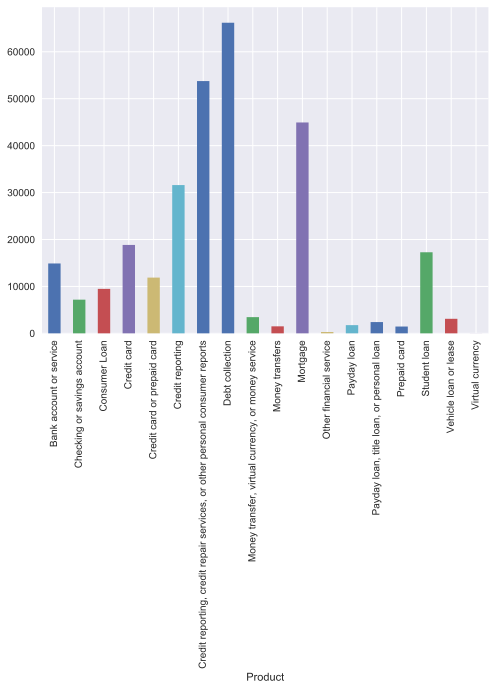

In [44]:
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

Dataset is biased towards 'credit reporting' and 'debt collection' categories. 

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')


In [ ]:
features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

Now, each of 4569 consumer complaint narratives is represented by 12633 features, representing the tf-idf score for different unigrams and bigrams.

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

In [ ]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))